In [1108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1109]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [1110]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [1111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [1112]:
data.shape

(8693, 14)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RoomService'}>],
       [<Axes: title={'center': 'FoodCourt'}>,
        <Axes: title={'center': 'ShoppingMall'}>],
       [<Axes: title={'center': 'Spa'}>,
        <Axes: title={'center': 'VRDeck'}>]], dtype=object)

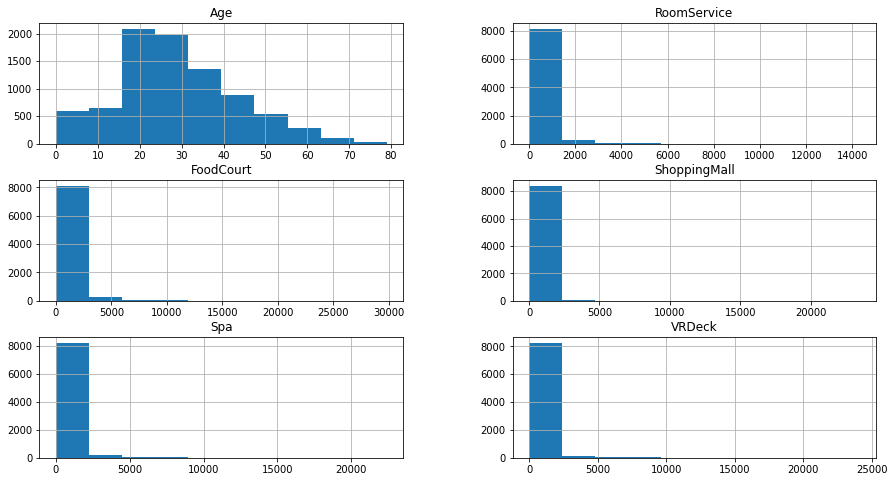

In [1113]:
data.hist(figsize=(15, 8))

# Train-Test Split

In [1114]:
from sklearn.model_selection import train_test_split

data_copy = data.copy()
data = pd.get_dummies(data, dtype='int', columns=['HomePlanet', 'Destination'])
train_data, test_data = train_test_split(data, random_state=42, train_size=0.8)
# train_data_copy, test_data_copy = train_data.copy(), test_data.copy()
train_data_copy, test_data_copy = train_test_split(data_copy, random_state=42, train_size=0.8)

print(train_data.shape)
print(test_data.shape)

(6954, 18)
(1739, 18)


In [1115]:
train_data.head()

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
2333,2513_01,False,NaN,28.0,False,0.0,55.0,0.0,656.0,0.0,Loree Mathison,False,1,0,0,0,0,1
2589,2774_02,False,F/575/P,17.0,False,0.0,1195.0,31.0,0.0,0.0,Crisey Mcbriddley,False,1,0,0,0,0,1
8302,8862_04,True,C/329/S,28.0,False,0.0,0.0,0.0,0.0,0.0,Alramix Myling,True,0,1,0,1,0,0
8177,8736_02,False,F/1800/P,20.0,False,NaN,2.0,289.0,976.0,0.0,Tros Pota,True,0,0,1,0,0,1
500,0539_02,True,C/18/P,36.0,False,0.0,0.0,0.0,0.0,0.0,Achyon Nalanet,True,0,1,0,1,0,0


# EDA

C:\Users\hi\AppData\Local\Temp\ipykernel_13752\2561385843.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x='Transported', palette='plasma')


<Axes: xlabel='Transported', ylabel='count'>

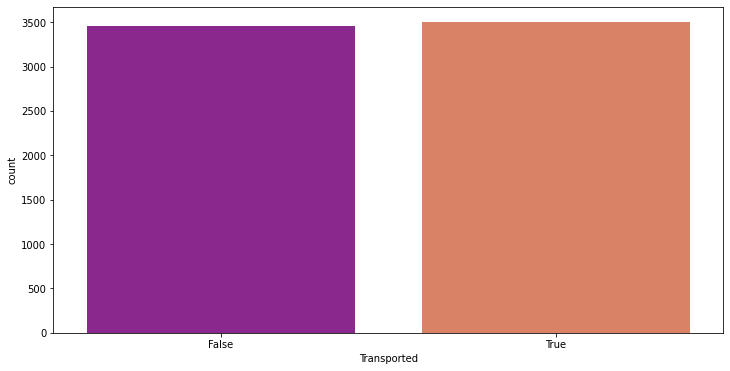

In [1116]:
plt.figure(figsize=(12, 6))
sns.countplot(data=train_data, x='Transported', palette='plasma')

##### This bar plot shows us that number of samplse in each category is equal. So we assured that the data is balanced

<Axes: ylabel='RoomService'>

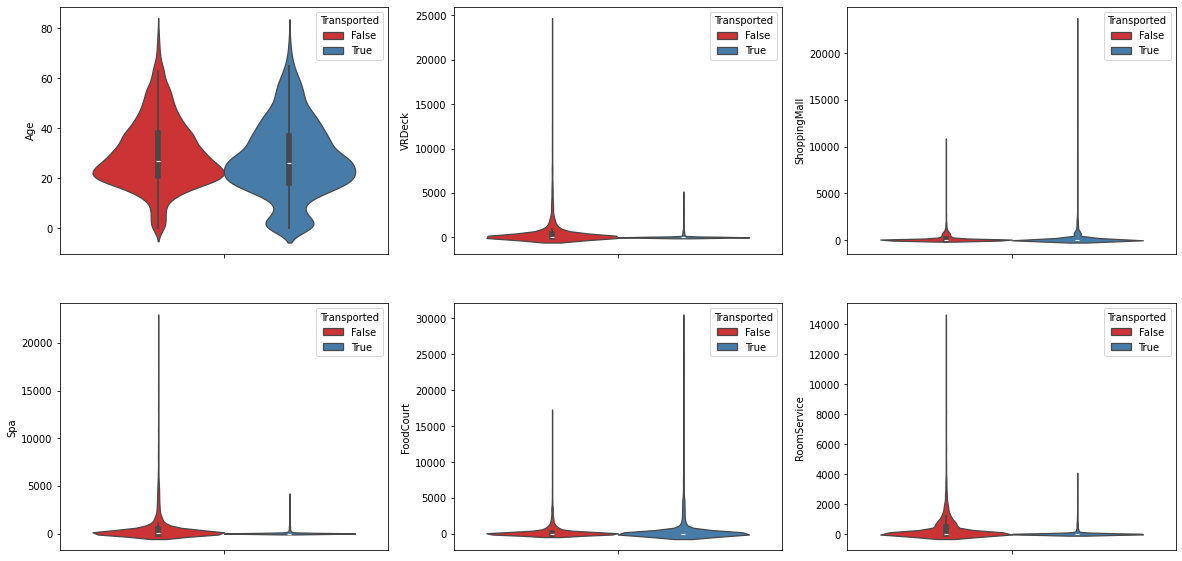

In [1117]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

sns.violinplot(y='Age', hue='Transported', data=data_copy, palette='Set1', ax=axs[0][0])
sns.violinplot(y='VRDeck', hue='Transported', data=data_copy, palette='Set1', ax=axs[0][1])
sns.violinplot(y='Spa', hue='Transported', data=data_copy, palette='Set1', ax=axs[1][0])
sns.violinplot(y='FoodCourt', hue='Transported', data=data_copy, palette='Set1', ax=axs[1][1])
sns.violinplot(y='ShoppingMall', hue='Transported', data=data_copy, palette='Set1', ax=axs[0][2])
sns.violinplot(y='RoomService', hue='Transported', data=data_copy, palette='Set1', ax=axs[1][2])

<Axes: xlabel='RoomService', ylabel='Density'>

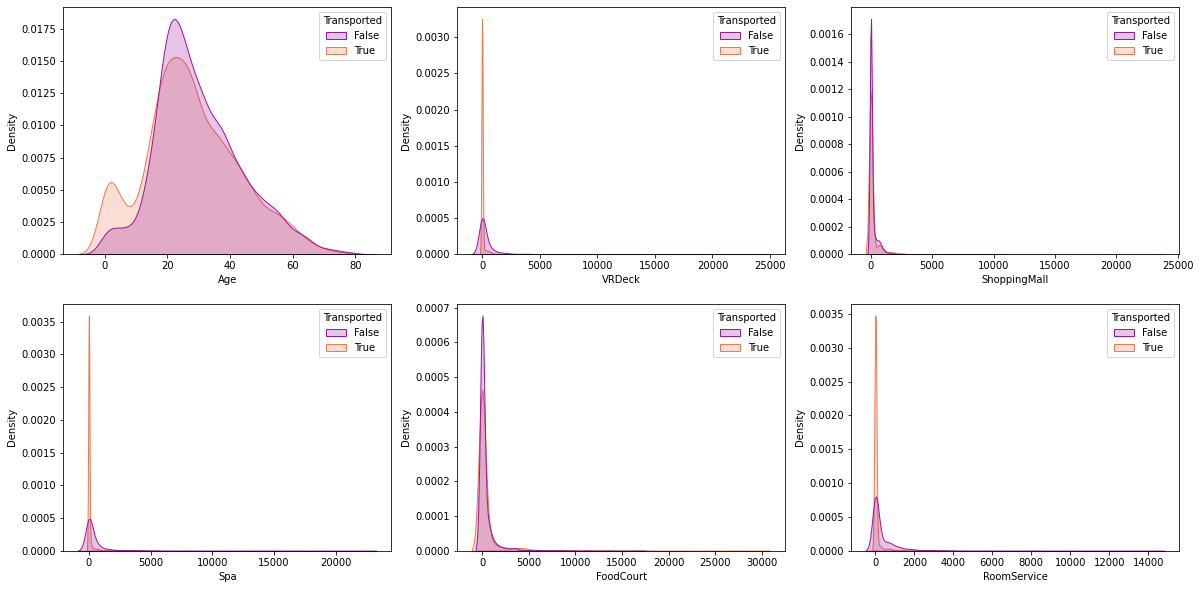

In [1118]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

sns.kdeplot(x='Age', hue='Transported', data=data_copy, palette='plasma', ax=axs[0][0], fill=True)
sns.kdeplot(x='VRDeck', hue='Transported', data=data_copy, palette='plasma', ax=axs[0][1], fill=True)
sns.kdeplot(x='Spa', hue='Transported', data=data_copy, palette='plasma', ax=axs[1][0], fill=True)
sns.kdeplot(x='FoodCourt', hue='Transported', data=data_copy, palette='plasma', ax=axs[1][1], fill=True)
sns.kdeplot(x='ShoppingMall', hue='Transported', data=data_copy, palette='plasma', ax=axs[0][2], fill=True)
sns.kdeplot(x='RoomService', hue='Transported', data=data_copy, palette='plasma', ax=axs[1][2], fill=True)

##### Using these two sets of plots we wanted to investigate the relation between each numerical variable and the target variable but as it is clear the distribution of each variable in both categories is aproximately the same.So, it is not possible to give a definite opinion.
##### By looking at violin plots we can see that there are lots of outliers in our data.

In [1119]:
contingency_table_VT = pd.crosstab(data_copy['VIP'], data_copy['Transported'])
print(contingency_table_VT)

Transported  False  True 
VIP                      
False         4093   4198
True           123     76


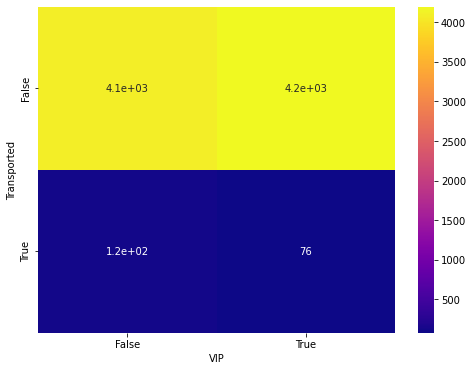

In [1120]:
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table_VT, annot=True, cmap='plasma')
plt.xlabel('VIP')
plt.ylabel('Transported')
plt.show()

In [1121]:
contingency_table_CT = pd.crosstab(data_copy['CryoSleep'], data_copy['Transported'])
print(contingency_table_CT)

Transported  False  True 
CryoSleep                
False         3650   1789
True           554   2483


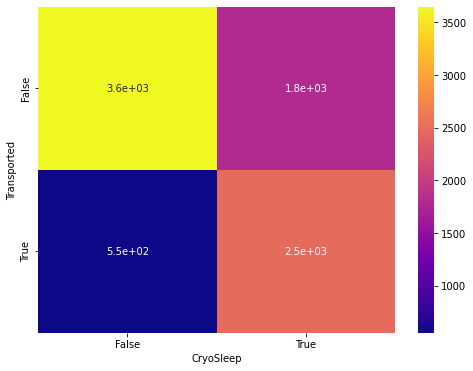

In [1122]:
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table_CT, annot=True, cmap='plasma')
plt.xlabel('CryoSleep')
plt.ylabel('Transported')
plt.show()

In [1123]:
contingency_table_HT = pd.crosstab(data_copy['HomePlanet'], data_copy['Transported'])
print(contingency_table_HT)

Transported  False  True 
HomePlanet               
Earth         2651   1951
Europa         727   1404
Mars           839    920


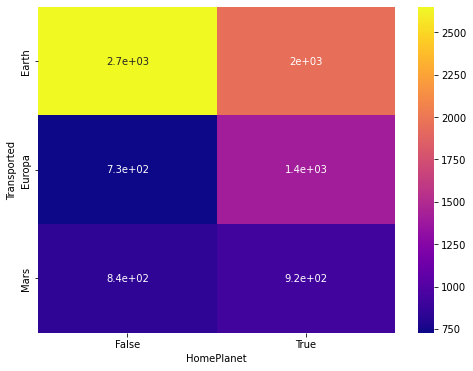

In [1124]:
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table_HT, annot=True, cmap='plasma')
plt.xlabel('HomePlanet')
plt.ylabel('Transported')
plt.show()

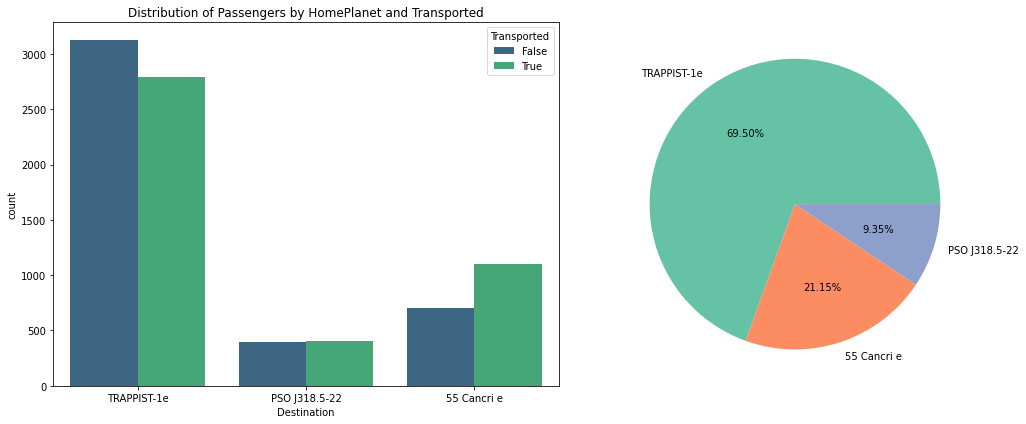

In [1125]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(x='Destination', hue='Transported', data=data_copy, palette='viridis', ax=axes[0]).set_title('Distribution of Passengers by HomePlanet and Transported')
plt.pie(data_copy['Destination'].value_counts(), labels=data_copy['Destination'].value_counts().index, autopct='%.2f%%', colors=sns.color_palette('Set2'))
plt.tight_layout()
plt.show()

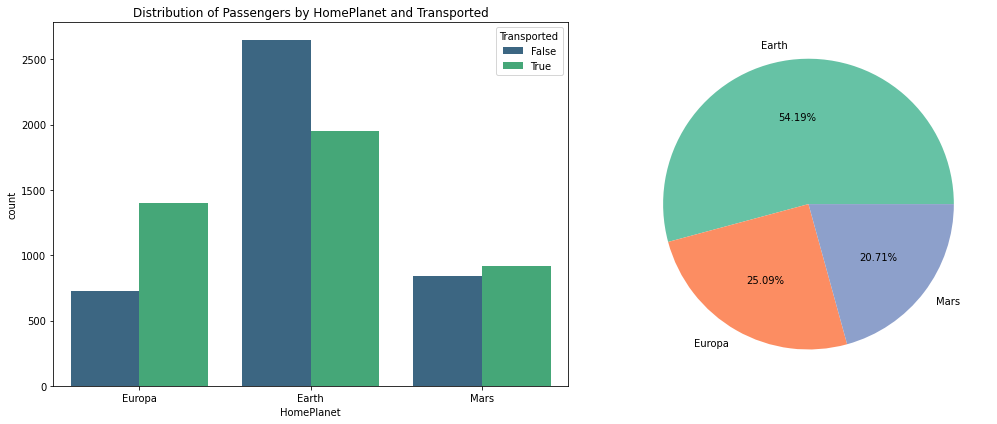

In [1126]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(x='HomePlanet', hue='Transported', data=data_copy, palette='viridis', ax=axes[0]).set_title('Distribution of Passengers by HomePlanet and Transported')
plt.pie(data_copy['HomePlanet'].value_counts(), labels=data_copy['HomePlanet'].value_counts().index, autopct='%.2f%%', colors=sns.color_palette('Set2'))
plt.tight_layout()
plt.show()

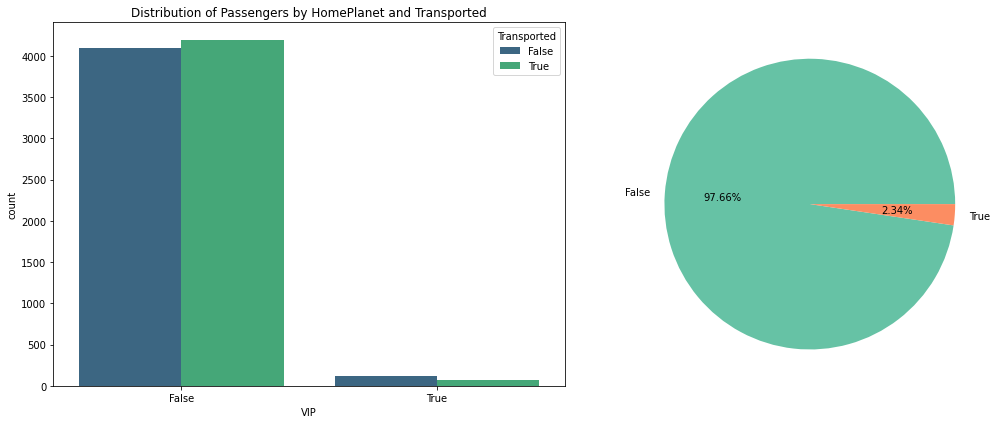

In [1127]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(x='VIP', hue='Transported', data=data_copy, palette='viridis', ax=axes[0]).set_title('Distribution of Passengers by HomePlanet and Transported')
plt.pie(data_copy['VIP'].value_counts(), labels=data_copy['VIP'].value_counts().index, autopct='%.2f%%', colors=sns.color_palette('Set2'))
plt.tight_layout()
plt.show()

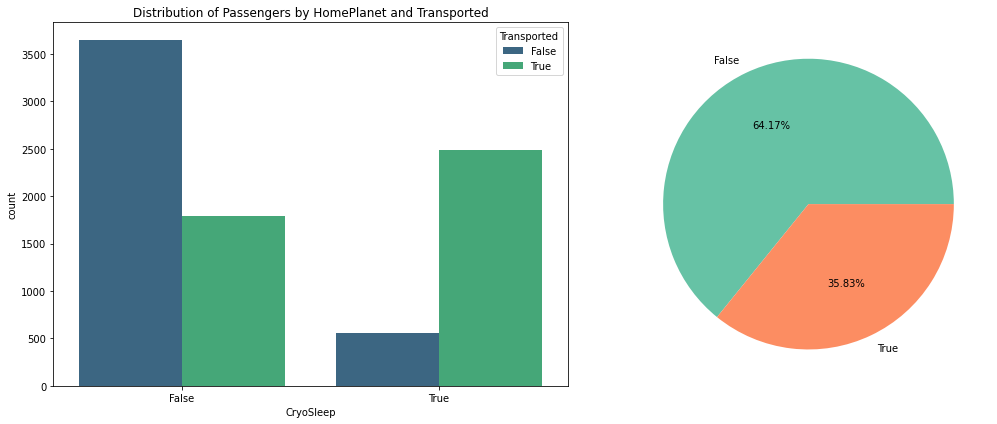

In [1128]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(x='CryoSleep', hue='Transported', data=data_copy, palette='viridis', ax=axes[0]).set_title('Distribution of Passengers by HomePlanet and Transported')
plt.pie(data_copy['CryoSleep'].value_counts(), labels=data_copy['CryoSleep'].value_counts().index, autopct='%.2f%%', colors=sns.color_palette('Set2'))
plt.tight_layout()
plt.show()

##### In this section we wanted to investigate the relation between each categorical variable and the target variable. Although the distribution of the categories are not the same and we can not speak definitely, the results arre as below:
##### CryoSleep: Most of the passengers has CryoSleep equal to false and between those who have false CryoSleep, more than 50% have not been transported and most of the passengers with this feature true have been trans ported so we can say that with CryoSleep equal to true you are more likely to be transported.
##### VIP: As it is obvious most of the passengers have this feature false so we can not give a definite opinion about this feature.
##### HomePlanet: Most of the passengers are from earth and also they are less likely to be transported as opposed to two other planets.

<Axes: >

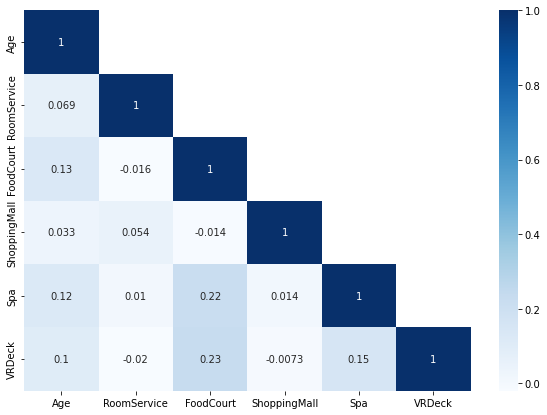

In [1129]:
num_data = data_copy.select_dtypes(['float', 'int'])
corr_matrix = num_data.corr()
plt.figure(figsize=(10, 7))
corr_matrix = corr_matrix.where(np.tril(np.ones(corr_matrix.shape)).astype(np.bool_))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')

# PreProcessing 
### 1) dropping PassengerId and Name column

In [1130]:
test_data = test_data.drop(columns=['PassengerId', 'Name'])
train_data = train_data.drop(columns=['PassengerId', 'Name'])
train_data.head()

,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
2333,False,NaN,28.0,False,0.0,55.0,0.0,656.0,0.0,False,1,0,0,0,0,1
2589,False,F/575/P,17.0,False,0.0,1195.0,31.0,0.0,0.0,False,1,0,0,0,0,1
8302,True,C/329/S,28.0,False,0.0,0.0,0.0,0.0,0.0,True,0,1,0,1,0,0
8177,False,F/1800/P,20.0,False,NaN,2.0,289.0,976.0,0.0,True,0,0,1,0,0,1
500,True,C/18/P,36.0,False,0.0,0.0,0.0,0.0,0.0,True,0,1,0,1,0,0


### 2) Imputing Missing values

In [1131]:
train_data.isnull().sum()

CryoSleep                    177
Cabin                        158
Age                          148
VIP                          162
RoomService                  126
FoodCourt                    140
ShoppingMall                 165
Spa                          134
VRDeck                       151
Transported                    0
HomePlanet_Earth               0
HomePlanet_Europa              0
HomePlanet_Mars                0
Destination_55 Cancri e        0
Destination_PSO J318.5-22      0
Destination_TRAPPIST-1e        0
dtype: int64

In [1132]:
test_numeric_data = test_data.select_dtypes(['float', 'int'])
train_numeric_data = train_data.select_dtypes(['float', 'int'])
train_numeric_data.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
2333,28.0,0.0,55.0,0.0,656.0,0.0,1,0,0,0,0,1
2589,17.0,0.0,1195.0,31.0,0.0,0.0,1,0,0,0,0,1
8302,28.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0
8177,20.0,NaN,2.0,289.0,976.0,0.0,0,0,1,0,0,1
500,36.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0


In [1133]:
test_str_data = test_data.select_dtypes(['object', 'bool'])
train_str_data = train_data.select_dtypes(['object', 'bool'])
train_str_data.head()

,CryoSleep,Cabin,VIP,Transported
2333,False,NaN,False,False
2589,False,F/575/P,False,False
8302,True,C/329/S,False,True
8177,False,F/1800/P,False,True
500,True,C/18/P,False,True


In [1134]:
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy='mean')
mod_imputer = SimpleImputer(strategy='most_frequent')

train_numeric_data = pd.DataFrame(mean_imputer.fit_transform(train_numeric_data), columns=train_numeric_data.columns, index=train_numeric_data.index)
train_str_data = pd.DataFrame(mod_imputer.fit_transform(train_str_data), columns=train_str_data.columns, index=train_str_data.index)

test_numeric_data = pd.DataFrame(mean_imputer.transform(test_numeric_data), columns=test_numeric_data.columns, index=test_numeric_data.index)
test_str_data = pd.DataFrame(mod_imputer.transform(test_str_data), columns=test_str_data.columns, index=test_str_data.index)

print(train_numeric_data.head())
print(train_str_data.head())

       Age  RoomService  FoodCourt  ShoppingMall    Spa  VRDeck  \
2333  28.0     0.000000       55.0           0.0  656.0     0.0   
2589  17.0     0.000000     1195.0          31.0    0.0     0.0   
8302  28.0     0.000000        0.0           0.0    0.0     0.0   
8177  20.0   222.822935        2.0         289.0  976.0     0.0   
500   36.0     0.000000        0.0           0.0    0.0     0.0   

      HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  \
2333               1.0                0.0              0.0   
2589               1.0                0.0              0.0   
8302               0.0                1.0              0.0   
8177               0.0                0.0              1.0   
500                0.0                1.0              0.0   

      Destination_55 Cancri e  Destination_PSO J318.5-22  \
2333                      0.0                        0.0   
2589                      0.0                        0.0   
8302                      1.0               

In [1135]:
train_data = pd.concat([train_numeric_data, train_str_data], axis=1)
test_data = pd.concat([test_numeric_data, test_str_data], axis=1)
train_data.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep,Cabin,VIP,Transported
2333,28.0,0.000000,55.0,0.0,656.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,False,B/82/S,False,False
2589,17.0,0.000000,1195.0,31.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,False,F/575/P,False,False
8302,28.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,True,C/329/S,False,True
8177,20.0,222.822935,2.0,289.0,976.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,False,F/1800/P,False,True
500,36.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,True,C/18/P,False,True


In [1136]:
test_data.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep,Cabin,VIP,Transported
304,19.0,417.0,349.0,634.0,3.000000,1057.0,0.0,0.0,1.0,0.0,0.0,1.0,False,F/63/S,False,True
2697,18.0,4.0,904.0,0.0,0.000000,1.0,1.0,0.0,0.0,0.0,0.0,1.0,False,G/460/S,False,False
8424,41.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,True,G/1449/S,False,False
1672,35.0,0.0,338.0,436.0,315.693842,0.0,1.0,0.0,0.0,0.0,0.0,1.0,False,G/291/P,False,True
8458,43.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,True,D/288/P,False,True


In [1137]:
train_data.isnull().sum()

Age                          0
RoomService                  0
FoodCourt                    0
ShoppingMall                 0
Spa                          0
VRDeck                       0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
CryoSleep                    0
Cabin                        0
VIP                          0
Transported                  0
dtype: int64

##### In this part we first splitted our data into to categorical and numerical data because we can not use the same approaches for both of them. Then we have exchanged null values with mean in numerical variable and most_frequent in categorical variable. For numerical variables we could also use median strategy but since we are suppose to use Linear Discriminant Analysis it is better to use mean strategy because this model is sensitive to the distribution of data.

### 3) Encoding categorical data

In [1138]:
test_data['CryoSleep'] = test_data['CryoSleep'].astype('int')
test_data['Transported'] = test_data['Transported'].astype('int')
test_data['VIP'] = test_data['VIP'].astype('int')

train_data['CryoSleep'] = train_data['CryoSleep'].astype('int')
train_data['Transported'] = train_data['Transported'].astype('int')
train_data['VIP'] = train_data['VIP'].astype('int')

train_data.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep,Cabin,VIP,Transported
2333,28.0,0.000000,55.0,0.0,656.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,B/82/S,0,0
2589,17.0,0.000000,1195.0,31.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,F/575/P,0,0
8302,28.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,C/329/S,0,1
8177,20.0,222.822935,2.0,289.0,976.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,F/1800/P,0,1
500,36.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,C/18/P,0,1


In [1139]:
from category_encoders.count import CountEncoder

co_encoder = CountEncoder()

cabin_train = train_data['Cabin']
train_data.drop(columns=['Cabin'], inplace=True)
cabin_train = pd.DataFrame(co_encoder.fit_transform(cabin_train), columns=['Cabin'], index=cabin_train.index)
train_data = pd.concat([train_data, cabin_train], axis=1)

cabin_test = test_data['Cabin']
test_data.drop(columns=['Cabin'], inplace=True)
cabin_test = pd.DataFrame(co_encoder.transform(cabin_test), columns=['Cabin'], index=cabin_test.index)
test_data = pd.concat([test_data, cabin_test], axis=1)
train_data.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep,VIP,Transported,Cabin
2333,28.0,0.000000,55.0,0.0,656.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0,165
2589,17.0,0.000000,1195.0,31.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0,2
8302,28.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,0,1,5
8177,20.0,222.822935,2.0,289.0,976.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,1,2
500,36.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,0,1,4


In [1140]:
test_data.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep,VIP,Transported,Cabin
304,19.0,417.0,349.0,634.0,3.000000,1057.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,1,2.0
2697,18.0,4.0,904.0,0.0,0.000000,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0.0
8424,41.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0.0
1672,35.0,0.0,338.0,436.0,315.693842,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0.0
8458,43.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,1,4.0


##### In this part we had three columns to be encoded. HomePlanet, Destination and Cabin. For the first two we used one hot encodeing because each include just 3 categories and it seems that one hot encoding would be the best choice but for the last one since it includes many categories, we can not use this approach. So in my opinion count encoding would be the best appraoch.
##### We also converted following columns to 0 and 1: (they were true and false)
##### VIP, CryoSleep, Transported

### 4) Dropping duplicate rows and outliers

In [1141]:
def z_score_outlier(data):
    drop_outliers = np.array([])
    for column in data.columns:
        if (not data[column].dtype == 'object'):
            upper_bound = data[column].mean() + 3 * data[column].std()
            lower_bound = data[column].mean() - 3 * data[column].std()
            data = data.loc[(data[column] < upper_bound) & (data[column] > lower_bound)]

    return data

In [1142]:
def iqr_outlier(data):
    drop_outliers = np.array([])
    for column in data.columns:
        if (not data[column].dtype == 'object'):
            Q1 = data[column].quantile(0.25)
            Q3 = data[column].quantile(0.75)
            if Q1 == np.nan:
                Q1 = 0
            if Q3 == np.nan:
                Q3 = 0
            IQR = Q3 - Q1
            upper_bound = Q3 + 1.5 * IQR
            lower_bound = Q1 - 1.5 * IQR
            data = data.loc[(data[column] <= upper_bound) & (data[column] >= lower_bound)]
            print(data.shape)

    return data

In [1143]:
train_data = z_score_outlier(train_data)
train_data.shape

(5467, 16)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RoomService'}>,
        <Axes: title={'center': 'FoodCourt'}>,
        <Axes: title={'center': 'ShoppingMall'}>],
       [<Axes: title={'center': 'Spa'}>,
        <Axes: title={'center': 'VRDeck'}>,
        <Axes: title={'center': 'HomePlanet_Earth'}>,
        <Axes: title={'center': 'HomePlanet_Europa'}>],
       [<Axes: title={'center': 'HomePlanet_Mars'}>,
        <Axes: title={'center': 'Destination_55 Cancri e'}>,
        <Axes: title={'center': 'Destination_PSO J318.5-22'}>,
        <Axes: title={'center': 'Destination_TRAPPIST-1e'}>],
       [<Axes: title={'center': 'CryoSleep'}>,
        <Axes: title={'center': 'VIP'}>,
        <Axes: title={'center': 'Transported'}>,
        <Axes: title={'center': 'Cabin'}>]], dtype=object)

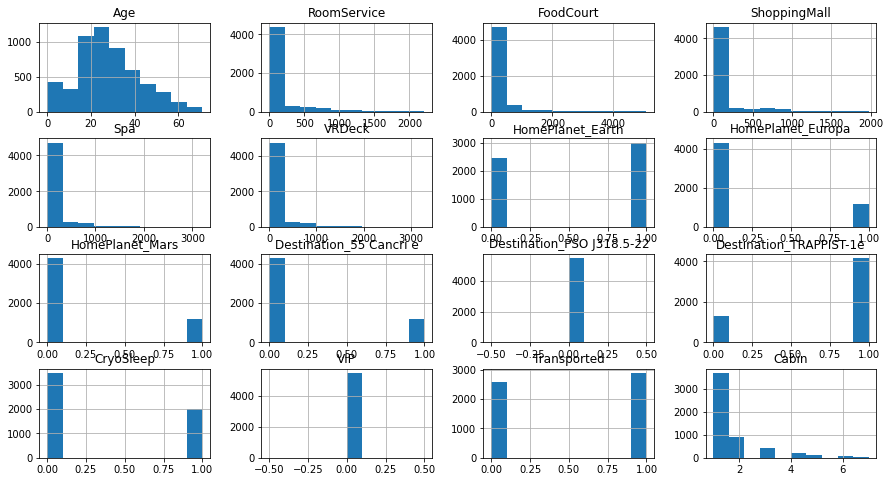

In [1144]:
train_data.hist(figsize=(15, 8))

In [1145]:
train_data = train_data.drop_duplicates()
train_data.shape

(4474, 16)

In [1146]:
train_y = train_data.iloc[:, 14].to_numpy()
train_x = train_data.drop(columns=['Transported'])

test_y = test_data.iloc[:, 14].to_numpy()
test_x = test_data.drop(columns=['Transported'])

### 5) Normalization

In [1147]:
from sklearn.preprocessing import StandardScaler

st_scaler = StandardScaler()

train_x = pd.DataFrame(st_scaler.fit_transform(train_x), columns=train_x.columns, index=train_x.index)
test_x = pd.DataFrame(st_scaler.transform(test_x), columns=test_x.columns, index=test_x.index)

In [1148]:
train_x

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep,VIP,Cabin
2589,-0.849856,-0.493378,1.127733,-0.367697,-0.424198,-0.421398,0.859157,-0.486410,-0.504954,-0.51435,0.0,0.557902,-0.578211,0.0,0.294948
8302,-0.082132,-0.493378,-0.398433,-0.461517,-0.424198,-0.421398,-1.163932,2.055878,-0.504954,1.94420,0.0,-1.792430,1.729474,0.0,2.816467
8177,-0.640477,0.052623,-0.395878,0.413127,1.686609,-0.421398,-1.163932,-0.486410,1.980377,-0.51435,0.0,0.557902,-0.578211,0.0,0.294948
500,0.476213,-0.493378,-0.398433,-0.461517,-0.424198,-0.421398,-1.163932,2.055878,-0.504954,1.94420,0.0,-1.792430,1.729474,0.0,1.975961
7203,0.546006,1.957003,-0.398433,-0.219401,-0.337690,-0.421398,-1.163932,-0.486410,1.980377,-0.51435,0.0,0.557902,-0.578211,0.0,-0.545559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,0.057454,1.511033,-0.342239,-0.455464,5.968779,4.849664,-1.163932,2.055878,-0.504954,1.94420,0.0,-1.792430,-0.578211,0.0,-0.545559
6265,-0.221718,-0.493378,-0.398433,-0.461517,-0.424198,-0.421398,-1.163932,2.055878,-0.504954,-0.51435,0.0,0.557902,-0.578211,0.0,-0.545559
5734,-0.780063,-0.459073,-0.395878,-0.025708,0.895056,-0.421398,0.859157,-0.486410,-0.504954,-0.51435,0.0,0.557902,-0.578211,0.0,-0.545559
5191,1.453316,1.197384,-0.398433,-0.370724,1.223789,0.554809,-1.163932,-0.486410,1.980377,-0.51435,0.0,0.557902,-0.578211,0.0,-0.545559


### 6) Feature Selection

In [1149]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC

LDA = LinearDiscriminantAnalysis(solver='lsqr')
k_element_scorse = []

for i in range(train_x.shape[1] - 1):
    forward_selector = SequentialFeatureSelector(estimator=LDA, n_features_to_select=i+1, direction='forward')
    forward_selector.fit(train_x, train_y)
    temp_selected = forward_selector.transform(train_x)
    scores = cross_validate(LDA, temp_selected, train_y, scoring=['f1', 'accuracy'])
    k_element_scorse.append(scores['test_f1'].mean())

scores = cross_validate(LDA, train_x, train_y, scoring=['f1', 'accuracy'])
k_element_scorse.append(scores['test_f1'].mean())

max_value = max(k_element_scorse)
max_indices = [i for i, x in enumerate(k_element_scorse) if x == max_value][0]
best_number = max_indices + 1

In [1150]:
print(best_number)

14


In [1151]:
best_selector = SequentialFeatureSelector(estimator=LDA, n_features_to_select=best_number, direction='forward')
best_selector.fit(train_x, train_y)

SequentialFeatureSelector(estimator=LinearDiscriminantAnalysis(solver='lsqr'),
                          n_features_to_select=14)

In [1152]:
best_selector.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True])

In [1153]:
train_x_selected = best_selector.transform(train_x)
test_x_selected = best_selector.transform(test_x)

##### The goal in this part of the work was to select the subset of features that would likely lead to the best results. To accomplish this, we have used the scikit-learn (sklearn) sequential feature selector. This is a tool that can select the best k-subset of features, where k is a specified number.
##### The we used a forward selection strategy with this feature selector. This means we started with an empty set of features, and iteratively added the feature that provided the greatest improvement to the model's performance.
##### After running the feature selector, we had the best subset of features for each possible value of k. Then we compared the performance of models built using these different feature subsets, evaluating them based on the F1-score metric.
##### In addition to the sequential feature selector, we also used Linear Discriminant Analysis (LDA) as another approach for feature selection. LDA is a technique that can identify the linear combinations of features that best separate the classes in the data.
##### So in summary, we employed forward feature selection using Linear Discriminant Analysis as estimator. We then evaluated the performance of models built using the selected feature subsets to determine the optimal set of features to use.
##### The goal was to identify the smallest subset of features that would still enable the model to achieve strong predictive performance, which is an important step in developing an efficient and effective machine learning solution.

# Model Training

In [1154]:
from sklearn.metrics import f1_score, precision_score, accuracy_score, confusion_matrix, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay, auc

def model_train_test_evaluating(x_train, y_train, x_test, y_test, model):
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    f1_train = f1_score(y_train, y_train_pred)
    f1_test = f1_score(y_test, y_test_pred) 

    print('train_data report:')
    cm = confusion_matrix(y_train, y_train_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)
    roc_auc = auc(fpr, tpr)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    ax1.set_title('Confusion Matrix')
    disp.plot(ax=ax1)
    ax2.set_title('ROC Curve')
    roc_display.plot(ax=ax2)
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    
    print('Acuuracy: ', end='')
    print(train_accuracy)
    print('F1_score: ', end='')
    print(f1_train)

    print('test_data report:')
    cm = confusion_matrix(y_test, y_test_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
    roc_auc = auc(fpr, tpr)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    ax1.set_title('Confusion Matrix')
    disp.plot(ax=ax1)
    ax2.set_title('ROC Curve')
    roc_display.plot(ax=ax2)
    plt.subplots_adjust(wspace=0.5)
    plt.show()

    print('Acuuracy: ', end='')
    print(test_accuracy)
    print('F1_score: ', end='')
    print(f1_test)

In [1155]:
lda = LinearDiscriminantAnalysis(solver='lsqr')
scores = cross_validate(lda, train_x, train_y, scoring=['f1', 'accuracy'])
print("mean f1_score: ", end='')
print(scores['test_f1'].mean())
print("mean accuracy: ", end='')
print(scores['test_accuracy'].mean())

mean f1_score: 0.7194243566783208
mean accuracy: 0.7628532863409696


train_data report:


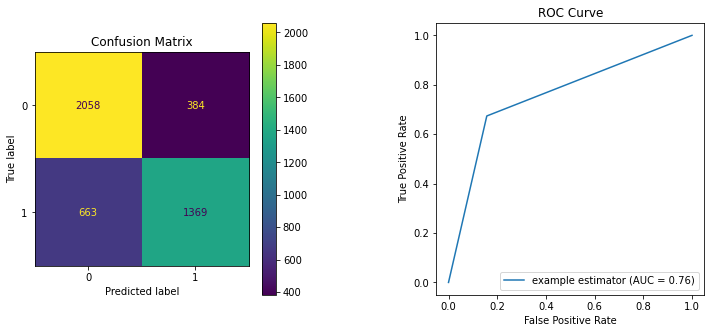

Acuuracy: 0.7659812248547161
F1_score: 0.7233817701453104
test_data report:


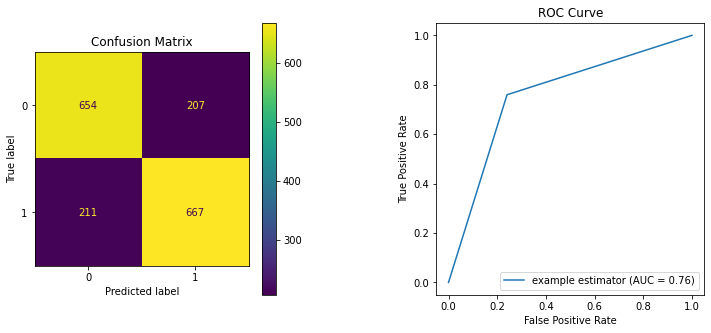

Acuuracy: 0.7596319723979299
F1_score: 0.7614155251141553


In [1156]:
model_train_test_evaluating(train_x, train_y, test_x, test_y, lda)

##### In this part of the analysis, Linear Discriminant Analysis was trained and evaluated. The following was done: the models were first evaluated using cross-validation techniques, which involves partitioning the available data into multiple subsets, using a portion of the data for training the model and the remaining portion for testing, repeating this process multiple times, and averaging the results to obtain a reliable estimate of the model's performance. During the cross-validation process, the accuracy and F1-score of each model were estimated, with the accuracy measuring the overall proportion of correct predictions made by the model, and the F1-score being a combination of precision and recall, providing a more balanced assessment of the model's performance, especially when dealing with imbalanced datasets. After evaluating the models using cross-validation, the trained models were then tested on a separate test dataset that was not used during the training or cross-validation process, in order to assess the generalization capability of the models and ensure that the performance estimates obtained from cross-validation are reliable. Finally, the results obtained from testing the models on the test data were compared to the performance estimates derived from the cross-validation process, to validate the accuracy of the cross-validation results and ensure that the models are not overfitting to the training data.

##### In the below you can see the results:
1. Estimated: <br>
F1 = 0.69 <br>
Accuracy = 0.75 <br>
2. Test: <br>
F1 = 0.75 <br>
Accuracy = 0.75

##### As it is clear the estimated values are close to the results we have got on test data.

# Train Model without preprocessing

In [1157]:
train_data_copy.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
2333,2513_01,Earth,False,NaN,TRAPPIST-1e,28.0,False,0.0,55.0,0.0,656.0,0.0,Loree Mathison,False
2589,2774_02,Earth,False,F/575/P,TRAPPIST-1e,17.0,False,0.0,1195.0,31.0,0.0,0.0,Crisey Mcbriddley,False
8302,8862_04,Europa,True,C/329/S,55 Cancri e,28.0,False,0.0,0.0,0.0,0.0,0.0,Alramix Myling,True
8177,8736_02,Mars,False,F/1800/P,TRAPPIST-1e,20.0,False,NaN,2.0,289.0,976.0,0.0,Tros Pota,True
500,0539_02,Europa,True,C/18/P,55 Cancri e,36.0,False,0.0,0.0,0.0,0.0,0.0,Achyon Nalanet,True


In [1158]:
train_data_copy.shape

(6954, 14)

In [1159]:
train_data_copy = train_data_copy.dropna()
test_data_copy = test_data_copy.dropna()
train_data_copy.shape

(5307, 14)

In [1160]:
train_data_copy['CryoSleep'] = train_data_copy['CryoSleep'].astype('int')
test_data_copy['CryoSleep'] = test_data_copy['CryoSleep'].astype('int')

train_data_copy['VIP'] = train_data_copy['VIP'].astype('int')
test_data_copy['VIP'] = test_data_copy['VIP'].astype('int')

train_data_copy['Transported'] = train_data_copy['Transported'].astype('int')
test_data_copy['Transported'] = test_data_copy['Transported'].astype('int')

In [1161]:
train_data_copy.drop(columns=['PassengerId', 'Name', 'HomePlanet', 'Destination', 'Cabin'], inplace=True)
test_data_copy.drop(columns=['PassengerId', 'Name', 'HomePlanet', 'Destination', 'Cabin'], inplace=True)

# train_data_copy.drop(columns=['PassengerId', 'Name'], inplace=True)
# test_data_copy.drop(columns=['PassengerId', 'Name'], inplace=True)

In [1162]:
train_data_copy.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
2589,0,17.0,0,0.0,1195.0,31.0,0.0,0.0,0
8302,1,28.0,0,0.0,0.0,0.0,0.0,0.0,1
500,1,36.0,0,0.0,0.0,0.0,0.0,0.0,1
7203,0,37.0,0,1000.0,0.0,80.0,40.0,0.0,0
6569,1,32.0,0,0.0,0.0,0.0,0.0,0.0,1


In [1163]:
# co_encoder2 = CountEncoder()

# cabin_train2 = train_data_copy['Cabin']
# train_data_copy.drop(columns=['Cabin'], inplace=True)
# cabin_train2 = pd.DataFrame(co_encoder.fit_transform(cabin_train2), columns=['Cabin'], index=cabin_train2.index)
# train_data_copy = pd.concat([train_data_copy, cabin_train2], axis=1)

# cabin_test2 = test_data_copy['Cabin']
# test_data_copy.drop(columns=['Cabin'], inplace=True)
# cabin_test2 = pd.DataFrame(co_encoder.transform(cabin_test2), columns=['Cabin'], index=cabin_test2.index)
# test_data_copy = pd.concat([test_data_copy, cabin_test2], axis=1)

In [1164]:
train_data_copy.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
2589,0,17.0,0,0.0,1195.0,31.0,0.0,0.0,0
8302,1,28.0,0,0.0,0.0,0.0,0.0,0.0,1
500,1,36.0,0,0.0,0.0,0.0,0.0,0.0,1
7203,0,37.0,0,1000.0,0.0,80.0,40.0,0.0,0
6569,1,32.0,0,0.0,0.0,0.0,0.0,0.0,1


In [1165]:
train_copy_y = train_data_copy.iloc[:, 8].to_numpy()
train_copy_x = train_data_copy.drop(columns=['Transported'])

test_copy_y = test_data_copy.iloc[:, 8].to_numpy()
test_copy_x = test_data_copy.drop(columns=['Transported'])

In [1166]:
st_scaler2 = StandardScaler()

train_copy_x = pd.DataFrame(st_scaler2.fit_transform(train_copy_x), columns=train_copy_x.columns, index=train_copy_x.index)
test_copy_x = pd.DataFrame(st_scaler2.transform(test_copy_x), columns=test_copy_x.columns, index=test_copy_x.index)

train_data report:


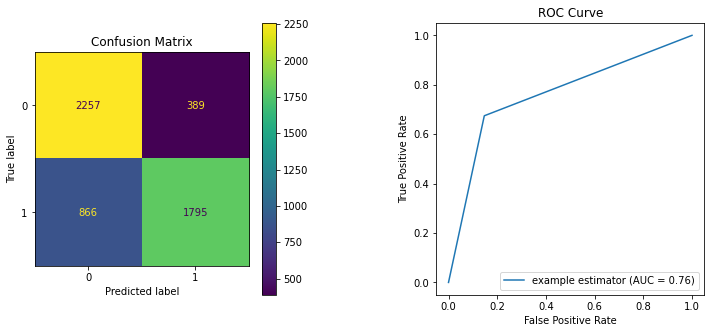

Acuuracy: 0.76351987940456
F1_score: 0.7409700722394221
test_data report:


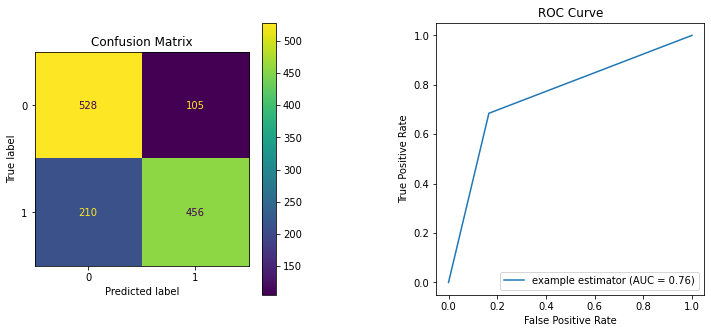

Acuuracy: 0.7575057736720554
F1_score: 0.7432762836185819


In [1167]:
lda2 = LinearDiscriminantAnalysis(solver='lsqr')
model_train_test_evaluating(train_copy_x, train_copy_y, test_copy_x, test_copy_y, model=lda2)